### Multiple Linear Regression Introduction

In this notebook (and following quizzes), you will be creating a few simple linear regression models, as well as a multiple linear regression model, to predict home value.

Let's get started by importing the necessary libraries and reading in the data you will be using.

In [29]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

df = pd.read_csv('data/house_prices.csv')
df.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price
0,1112,B,1188,3,2,ranch,598291
1,491,B,3512,5,3,victorian,1744259
2,5952,B,1134,3,2,ranch,571669
3,3525,A,1940,4,2,ranch,493675
4,5108,B,2208,6,4,victorian,1101539


`1.` Using statsmodels, fit three individual simple linear regression models to predict price.  You should have a model that uses **area**, another using **bedrooms**, and a final one using **bathrooms**.  You will also want to use an intercept in each of your three models.

Use the results from each of your models to answer the first two quiz questions below.

In [3]:
df.describe()

,house_id,area,bedrooms,bathrooms,price
count,6028.000000,6028.000000,6028.000000,6028.000000,6.028000e+03
mean,4110.536828,2136.849038,3.717651,2.158261,7.542079e+05
std,2251.834665,1237.481101,1.704650,1.169621,5.236731e+05
min,200.000000,0.000000,0.000000,0.000000,1.216700e+04
25%,2167.500000,1225.000000,3.000000,2.000000,3.641350e+05
50%,4120.500000,1826.000000,4.000000,2.000000,6.357590e+05
75%,6070.250000,3129.000000,5.000000,3.000000,9.666752e+05
max,7999.000000,7447.000000,8.000000,5.000000,3.684602e+06


In [4]:
y=df['price']
x1=df['area']

In [5]:
x=sm.add_constant(x1)
results=sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                 1.269e+04
Date:                Mon, 17 Jan 2022   Prob (F-statistic):               0.00
Time:                        22:03:21   Log-Likelihood:                -84517.
No. Observations:                6028   AIC:                         1.690e+05
Df Residuals:                    6026   BIC:                         1.691e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9587.8878   7637.479      1.255      0.209   -5384.303    2.46e+04
area         348.4664      3.093    112.662      0.000     342.403     354.530
==============================================================================
Omnibus:                      368.609   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              349.279
Skew:                           0.534   Prob(JB):                     1.43e-76
Kurtosis:                       2.499   Cond. No.                     4.93e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.93e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
yhat=results.predict(x)

In [17]:
df_new=df.copy()
df_new['yhat']=yhat
df_new.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price,yhat
0,1112,B,1188,3,2,ranch,598291,4.235659e+05
1,491,B,3512,5,3,victorian,1744259,1.233402e+06
2,5952,B,1134,3,2,ranch,571669,4.047487e+05
3,3525,A,1940,4,2,ranch,493675,6.856126e+05
4,5108,B,2208,6,4,victorian,1101539,7.790016e+05


In [18]:
df_new.rename(columns={'price':'y'},inplace=True)
df_new.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,y,yhat
0,1112,B,1188,3,2,ranch,598291,4.235659e+05
1,491,B,3512,5,3,victorian,1744259,1.233402e+06
2,5952,B,1134,3,2,ranch,571669,4.047487e+05
3,3525,A,1940,4,2,ranch,493675,6.856126e+05
4,5108,B,2208,6,4,victorian,1101539,7.790016e+05


In [19]:
df_new['y_yhat']=df_new['y']-df_new['yhat']
df_new.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,y,yhat,y_yhat
0,1112,B,1188,3,2,ranch,598291,4.235659e+05,174725.082090
1,491,B,3512,5,3,victorian,1744259,1.233402e+06,510857.272312
2,5952,B,1134,3,2,ranch,571669,4.047487e+05,166920.265277
3,3525,A,1940,4,2,ranch,493675,6.856126e+05,-191937.617115
4,5108,B,2208,6,4,victorian,1101539,7.790016e+05,322537.399657


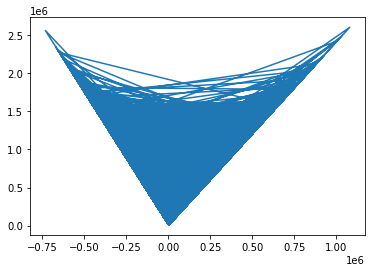

In [28]:
import matplotlib.pyplot as plt
plt.plot(df_new['y_yhat'],df_new['yhat'])

In [5]:
x1=df['bedrooms']
x=sm.add_constant(x1)
results=sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     7446.
Date:                Mon, 17 Jan 2022   Prob (F-statistic):               0.00
Time:                        17:54:05   Log-Likelihood:                -85509.
No. Observations:                6028   AIC:                         1.710e+05
Df Residuals:                    6026   BIC:                         1.710e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9.485e+04   1.08e+04     -8.762      0.000   -1.16e+05   -7.36e+04
bedrooms    2.284e+05   2646.744     86.289      0.000    2.23e+05    2.34e+05
==============================================================================
Omnibus:                      967.118   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1599.431
Skew:                           1.074   Prob(JB):                         0.00
Kurtosis:                       4.325   Cond. No.                         10.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
x1=df['bathrooms']
x=sm.add_constant(x1)
results=sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     7116.
Date:                Mon, 17 Jan 2022   Prob (F-statistic):               0.00
Time:                        17:54:08   Log-Likelihood:                -85583.
No. Observations:                6028   AIC:                         1.712e+05
Df Residuals:                    6026   BIC:                         1.712e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.314e+04   9587.189      4.500      0.000    2.43e+04    6.19e+04
bathrooms   3.295e+05   3905.540     84.358      0.000    3.22e+05    3.37e+05
==============================================================================
Omnibus:                      915.429   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1537.531
Skew:                           1.010   Prob(JB):                         0.00
Kurtosis:                       4.428   Cond. No.                         5.84
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

`2.` Now that you have looked at the results from the simple linear regression models, let's try a multiple linear regression model using all three of these variables  at the same time.  You will still want an intercept in this model.

In [7]:
x1=df[['area','bedrooms','bathrooms']]
x=sm.add_constant(x1)
results=sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     4230.
Date:                Mon, 17 Jan 2022   Prob (F-statistic):               0.00
Time:                        17:54:10   Log-Likelihood:                -84517.
No. Observations:                6028   AIC:                         1.690e+05
Df Residuals:                    6024   BIC:                         1.691e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.007e+04   1.04e+04      0.972      0.331   -1.02e+04    3.04e+04
area         345.9110      7.227     47.863      0.000     331.743     360.079
bedrooms   -2925.8063   1.03e+04     -0.285      0.775    -2.3e+04    1.72e+04
bathrooms   7345.3917   1.43e+04      0.515      0.607   -2.06e+04    3.53e+04
==============================================================================
Omnibus:                      367.658   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              350.116
Skew:                           0.536   Prob(JB):                     9.40e-77
Kurtosis:                       2.503   Cond. No.                     1.16e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
Y=y
X=x
X.head()

,const,area,bedrooms,bathrooms
0,1.0,1188,3,2
1,1.0,3512,5,3
2,1.0,1134,3,2
3,1.0,1940,4,2
4,1.0,2208,6,4


In [15]:
np.dot(np.linalg.inv(np.dot(X.transpose(),X)),np.dot(X.transpose(),y))

array([ 10072.10704672,    345.91101884,  -2925.80632466,   7345.39171369])

`3.` Along with using the **area**, **bedrooms**, and **bathrooms** you might also want to use **style** to predict the price.  Try adding this to your multiple linear regression model.  What happens?  Use the final quiz below to provide your answer.

In [15]:
x1=df[['area','bedrooms','bathrooms','style']]
x=sm.add_constant(x1)
results=sm.OLS(y,x).fit()
results.summary()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [30]:
df.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price
0,1112,B,1188,3,2,ranch,598291
1,491,B,3512,5,3,victorian,1744259
2,5952,B,1134,3,2,ranch,571669
3,3525,A,1940,4,2,ranch,493675
4,5108,B,2208,6,4,victorian,1101539


In [31]:
df['bedrooms_squ']=df['bedrooms']*df['bedrooms']
df.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price,bedrooms_squ
0,1112,B,1188,3,2,ranch,598291,9
1,491,B,3512,5,3,victorian,1744259,25
2,5952,B,1134,3,2,ranch,571669,9
3,3525,A,1940,4,2,ranch,493675,16
4,5108,B,2208,6,4,victorian,1101539,36


In [32]:
y=df['price']
x1=df[['bedrooms','bedrooms_squ']]

In [33]:
x=sm.add_constant(x1)
results=sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     4199.
Date:                Wed, 19 Jan 2022   Prob (F-statistic):               0.00
Time:                        11:56:46   Log-Likelihood:                -85302.
No. Observations:                6028   AIC:                         1.706e+05
Df Residuals:                    6025   BIC:                         1.706e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.509e+05   1.58e+04      9.524      0.000     1.2e+05    1.82e+05
bedrooms      5.223e+04   8906.834      5.865      0.000    3.48e+04    6.97e+04
bedrooms_squ  2.446e+04   1184.538     20.647      0.000    2.21e+04    2.68e+04
==============================================================================
Omnibus:                      626.860   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              916.588
Skew:                           0.793   Prob(JB):                    9.23e-200
Kurtosis:                       4.064   Cond. No.                         87.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""